In [1]:
#Intro

In the cell below, the required modules are imported as well as the data is declared and separated into different subsets.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset given
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], 
                 [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], 
                 [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Use 3/4 of the data for training
X_train = np.asarray(X[0:15])
y_train = np.asarray(y[0:15])

# Use the last 1/4 of the data for testing
X_test = np.asarray (X[15:20])
y_test = np.asarray(y[15:20])

In this cell, the main class is created

In [66]:
class LogisticRegression:
    '''
    Class to instantiate a logistic regression model.
    Require parameters: (Learning rate, Number of iterations, Threshold)
    The object of this class will train a logistic regression model using its method `fit`
    The method `predict` will predict the classes for a given set.
    '''

    # Constructor - It sets the basic variables
    def __init__(self, learning_rate = 0.01, iteration = 100000, threshold = 0.5):
        
        # Set the learning rate, number of iterations and threshold
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.threshold = threshold

        # Data structure to store the loss of each iteration
        self.all_loss_arr = []
        
        # Data structure to store the gradient of each iteration
        self.all_grad_arr = []
    
        
    # Converts the dataset into a matrix for linear system of equations (adding ones)
    def convert_matrix(self, X):
        total_ones = np.ones((X.shape[0], 1))
        return np.concatenate((total_ones, X), axis=1)
    
    
    # Sigmoid function that requires the hypothesis of the linear regression
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    # Calculate the loss of the hypothesis using the cross entropy formula
    def cross_entropy(self, hypothesis, y):
        return (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)).mean()
    
    
    def fit(self, dataset, y):
        '''
        Train the logistic regression model. It uses helper methods `convert_matrix`, `sigmoid` and `cross_entropy`
        Required parameters: X, y
        Return: none
        '''
        
        # Convert the dataset into a matrix
        dataset = self.convert_matrix(dataset)
      
        # Initializate the coefficients as (0, 0)
        self.theta = np.zeros(dataset.shape[1])
        
        # Iterate the number of times chosen 
        for i in range(self.iteration):

            # Linear regression hypothesis
            z = np.dot(dataset, self.theta)
            
            # Logistic regression hyphotesis
            hypothesis = self.sigmoid(z)
            
            # Calculate the loss of each hypothesis
            loss = hypothesis - y
            
            # Calculate the batch gradient from the loss
            batch_gradient = np.dot(dataset.T, (loss)) / y.size
            
            # Update the coefficients achieved in this iteration
            self.theta -= self.learning_rate * batch_gradient
            
            # Store the cross entropy cost in data structure (for plotting) - Reduce float precision
            cost_value = np.round(self.cross_entropy(hypothesis, y), 8)
            self.all_loss_arr.append(cost_value)
            
            # Store each gradient in data structure
            self.all_grad_arr.append(batch_gradient)
            
    # --------------------------------------------------------------------- #
    
    def predict(self, test_dataset):
        '''
        Predict classes of the given data.
        Required parameters: y_test
        Return: Array of classes
        '''
        
        # Find the logistic regression
        test_dataset = self.convert_matrix(test_dataset)
        logistic_regression = self.sigmoid(np.dot(test_dataset, self.theta))

        # Evaluate with threshold and return
        return np.array((logistic_regression >= self.threshold), dtype=int)
    
    # --------------------------------------------------------------------- #
    
    def plot_costs(self):
        '''
        Plot the lost function 
        '''
        plt.figure(figsize=(30,10))
        plt.scatter(range(len(self.all_loss_arr)), self.all_loss_arr)
        plt.show()
        
        
    def find_converged(self):
        '''
            FIND AT WHAT ITERATION THE ALGORITHM CONVERGES
        '''
        lastiteration = self.all_loss_arr[len(self.all_loss_arr) -1]
        
        for i in range(len(self.all_loss_arr)):
                        
            # Get the iteration value for question A
            if(lastiteration == self.all_loss_arr[i]):
                return i

       

###### Instantiate an object for Logistic Regression
The code below creates an object from 

In [114]:
# Instantiate a new logistic regression model and fit the data
newregression = LogisticRegression(learning_rate = 1.1, iteration = 1800, threshold = 0.5)
newregression.fit(X, y)

print("Coefficients:", newregression.theta)

# Example to calculate the predictions
predictions = newregression.predict(X_test)
print("\nPredictions:", predictions)

# Get accuracy of the model
accuracy_array = (predictions == y_test).mean()
print("\nAccuracy:", accuracy_array)    

Coefficients: [-2.92021477  1.06618642]

Predictions: [1 1 1 1 1]

Accuracy: 1.0


## 2. Writeup

To implement Logistric Regression and I created a class with separate well-structure methods.
It requires of 3 initial values to initiate the object: Alpha (learning rate), number of iteraions and a threshold for evaluating the predictions.<br>

Right after I call the main method `fit()` and pass the dataset and its classes for training (X and y), it performs basic conversion of the data such as creating the matrix for linear regression and initiates the coefficients (theta). 
It then starts iterating to find the optimal values for the gradient, coefficients and its cost. 
1. Calculates the linear regression using the dataset and actual coefficients
2. Use the linear regression to calculate the logistic hypothesis with sigmoid formula
3. Find the loss of the logistic regression and use it in the Batch Gradient formula
4. Update the coefficients with the learning rate and gradient from previous 
5. Finally, it calculates the cost of the hypothesis in this iteration and appends to a data struture for plotting








## 3. Question I
**After how many iterations, and for which learning rate (α) did your
algorithm converge? Plot the loss function with respect to iterations to illustrate this
point.**

The graph illustrates that the algorithm converged at around 90th iteration using 1.1 for the learning rate (α) . However, `find_converged` method determined the algorithm fully converged at the 282th iteration.


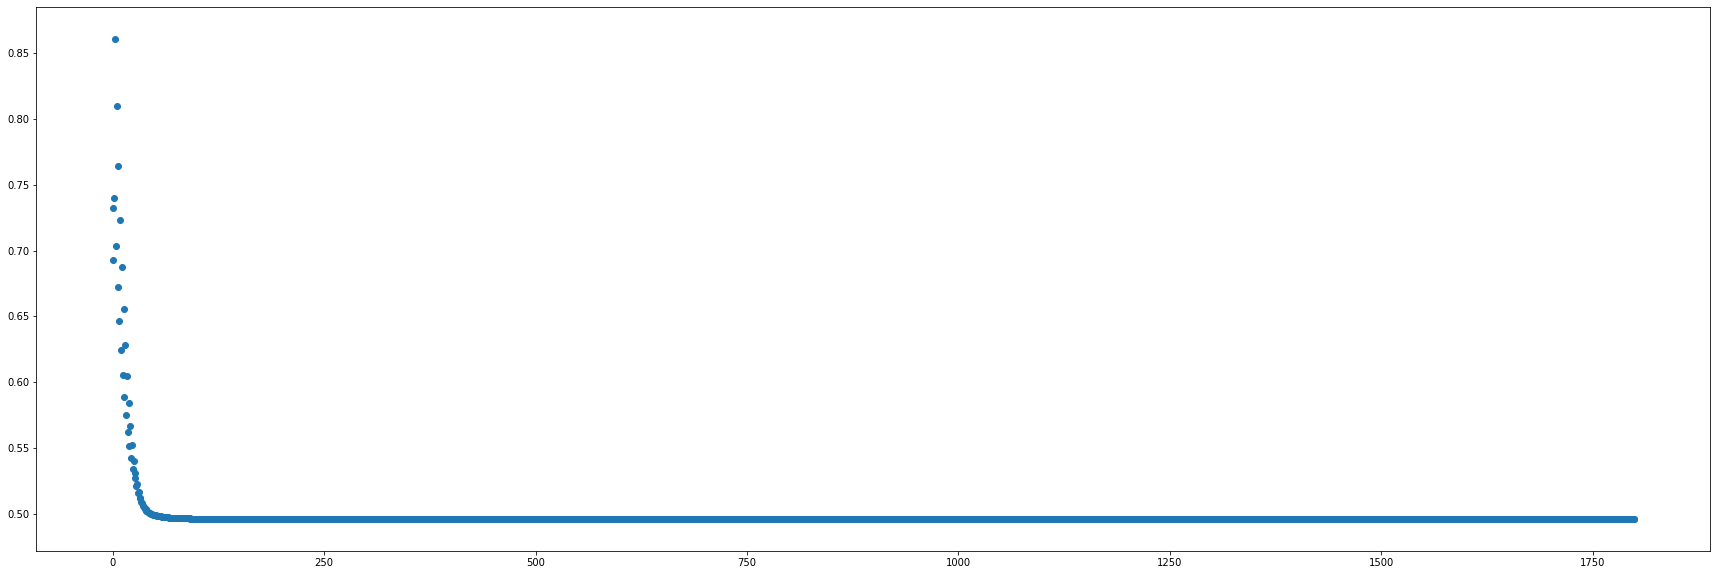

The algorithm fully converged at the 282 iteration


In [115]:
# Plot the loss function
newregression.plot_costs()

# Find at what iteration the algorithm converged
iterationfound = newregression.find_converged()
print("The algorithm fully converged at the", iterationfound, "iteration")

## 4. Question II
**What happens if α is too large? How does this affect the loss function?
Plot the loss function with respect to iterations to illustrate this point.**

Increasing the learning rate (α) to 1.6 causes that the loss function diverges drastically because it scales the magnitude of the weights updates very slow.

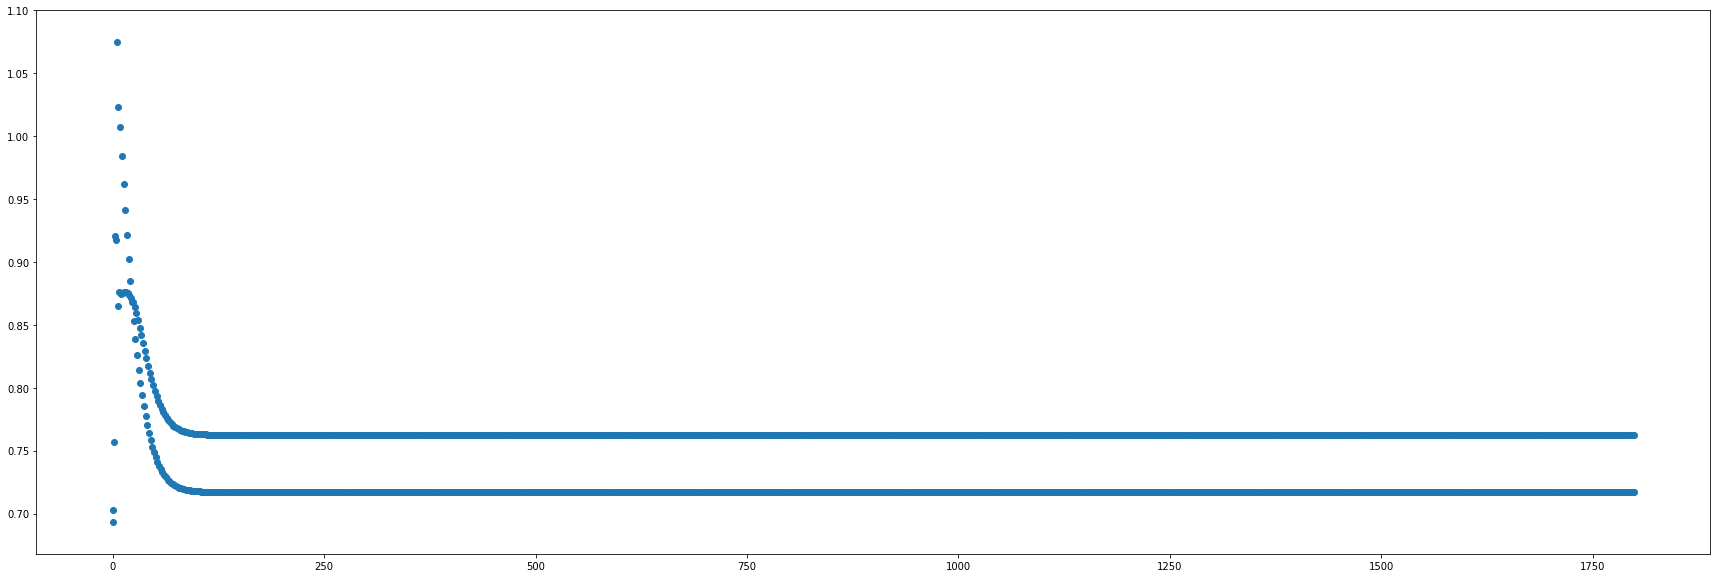

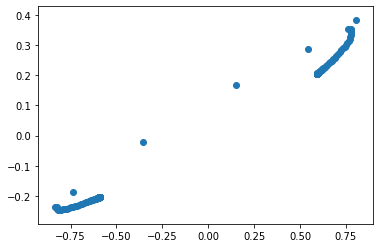

In [136]:
# Instantiate a new logistic regression model and fit the data
model_b = LogisticRegression(learning_rate=1.6, iteration=1800)
model_b.fit(X_train, y_train)

# Plot the loss function
model_b.plot_costs()


#try to plot the weird learning rate change
final = np.array(model_b.all_grad_arr)

plt.scatter(final[:,1], final[:,0])
plt.show()


## 5. Question III

**Assume that you are applying logistic regression to the iris (flower)
dataset, as in the previous assignment. Answer the following questions:<br>**
- **(a) How would your hypothesis function change in this case and why?**

The iris dataset has the characteristic of having four different attributes. 

- **(b) How would you utilize your implementation of logistic regression in order toperform (multi-class) classification on the iris dataset? Include some pseudocode while discussing your approach.**




Get explanation:  https://www.jeremyjordan.me/nn-learning-rate/